### Data Dictionary

- Features:
    + RowNumber - the index of the row in the data
    + CustomerId - unique customer identifier
    + Surname - surname
    + CreditScore - credit rating
    + Geography - country of residence
    + Gender - gender
    + Age - age
    + Tenure - how many years a person has been a client of the bank
    + Balance - account balance
    + NumOfProducts - the number of bank products used by the client
    + HasCrCard - availability of a credit card
    + IsActiveMember - client activity
    + EstimatedSalary - estimated salary

- Target column:
    + Exited - the fact of the client's departure

### Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Processing/ Cleaning

- I will drop "RowNumber", "CustomerId", and "Surname" columns because there are identification columns and they dont affact to the target column "Exited"

In [4]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 1, inplace= True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### EDA

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


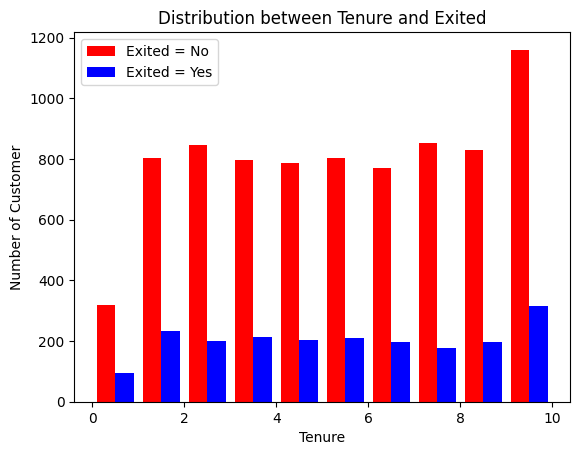

In [9]:
tenure_exited_no = df[df['Exited'] == 0].Tenure
tenure_exited_yes = df[df['Exited'] == 1].Tenure

plt.hist([tenure_exited_no, tenure_exited_yes], color= ['red', 'blue'], label= ['Exited = No', 'Exited = Yes'])
plt.xlabel('Tenure')
plt.ylabel('Number of Customer')
plt.title('Distribution between Tenure and Exited')
plt.legend()

- Tỉ lệ mà khách hàng không hứng thú với việc gia hạn với ngân hàng (theo năm) luôn cao hơn so với khác hàng hứng thú với việc gia hạn kéo dài. Đặc biệt, đối với khách hàng hứng thú hay không hứng thú thì thời gian mà gia hạn lâu nhất là 10 năm luôn cao nhất so với thời gian gia hạn còn lại. Có nghĩa là ta có thể thấy được khách hàng có xu hướng gia hạn với ngân hàng 1 khoảng thời gian rất lâu mặc dù có thích hay không thích

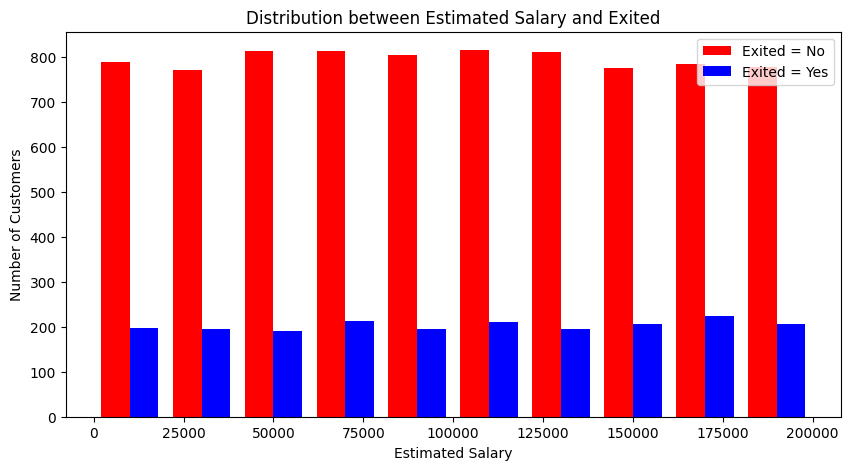

In [10]:
salary_exited_no = df[df['Exited'] == 0].EstimatedSalary
salary_exited_yes = df[df['Exited'] == 1].EstimatedSalary

plt.figure(figsize= (10, 5))
plt.hist([salary_exited_no, salary_exited_yes], color= ['red', 'blue'], label= ['Exited = No', 'Exited = Yes'])
plt.xlabel('Estimated Salary')
plt.ylabel('Number of Customers')
plt.title('Distribution between Estimated Salary and Exited')
plt.legend()

- The probability of customers who attach with the bank is quite same in every salary and still always higher than that of who exit the bank
-  Overall, the percentage of customers who attach with the bank occupy higher

### Feature Engineering

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

- I will use Label Encoding method to convert columns "Gender" and "Geography"

In [13]:
df['Gender'].replace({'Female': 0, 'Male': 1}, inplace= True)
df.sample(5)

C:\Users\ngmin\AppData\Local\Temp\ipykernel_26084\3178150206.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Female': 0, 'Male': 1}, inplace= True)
C:\Users\ngmin\AppData\Local\Temp\ipykernel_26084\3178150206.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8055,657,Spain,1,41,8,109402.13,1,1,1,66463.62,0
8507,653,Germany,0,38,5,114268.22,2,1,1,89524.83,0
7753,605,Germany,1,28,10,113690.83,1,1,0,33114.24,0
895,728,Germany,1,32,5,61825.50,1,1,1,156124.93,0
2729,667,France,1,23,1,0.00,2,1,0,91573.19,0


In [14]:
df_after_encode = pd.get_dummies(data= df, columns= ['Geography'])
df_after_encode = df_after_encode.astype({col: int for col in df_after_encode.select_dtypes('bool').columns})
df_after_encode.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
8875,702,1,36,9,90560.48,2,1,0,174268.87,0,0,1,0
9278,443,1,35,6,161111.45,1,0,0,13946.66,0,1,0,0
5011,480,1,47,8,75408.33,1,1,0,25887.89,1,0,0,1
2715,649,1,38,1,122214.00,1,0,1,88965.46,0,1,0,0
1498,595,0,25,7,106570.34,2,0,1,177025.79,0,0,1,0


- Next, I will scailing the columns "CreditScore", "Age", "Balance", "Tenure", "EstimatedSalary" to about (0, 1)
- I will use Min_Max_Scaler to convert

In [15]:
#import min_max_scaler
from sklearn.preprocessing import MinMaxScaler

# Các cột cần scail
cols_to_scail = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Khởi tạo min_max_scaling
scaler = MinMaxScaler()

# Thực hiện scailing
df_after_encode[cols_to_scail] = scaler.fit_transform(df_after_encode[cols_to_scail])

In [16]:
df_after_encode.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5671,0.786,0,0.743243,0.6,0.000000,2,0,1,0.539331,0,1,0,0
2112,0.244,0,0.135135,0.4,0.000000,2,1,0,0.008952,0,0,0,1
780,0.578,1,0.121622,0.8,0.000000,2,1,0,0.961271,0,1,0,0
9104,0.612,0,0.216216,0.6,0.238652,1,1,0,0.070112,1,0,0,1
5320,0.350,1,0.243243,0.3,0.310525,1,1,0,0.336164,0,0,0,1


### Split data to training data and test data to build ANN model

In [22]:
df_final = df_after_encode.copy()

X = df_final.drop(['Exited'], axis= 1)
y = df_final['Exited']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [24]:
len(X_train)

8000

### Building ANN model

In [26]:
X_train.shape

(8000, 12)

In [25]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9254,0.672,1,0.189189,0.6,0.000000,2,1,1,0.895494,1,0,0
1561,0.564,1,0.324324,0.4,0.476786,2,1,1,0.979930,0,1,0
1670,0.418,1,0.081081,0.3,0.457317,1,1,0,0.429438,0,0,1
6087,0.422,0,0.121622,0.9,0.540606,1,1,0,0.765417,1,0,0
6669,0.334,1,0.513514,0.9,0.566554,1,0,0,0.197401,1,0,0
5933,0.438,1,0.310811,0.4,0.479252,1,1,0,0.815770,1,0,0
8829,0.666,0,0.297297,0.1,0.000000,2,0,0,0.378788,1,0,0
7945,0.818,0,0.364865,0.8,0.000000,2,1,1,0.496246,1,0,0
3508,0.152,0,0.216216,0.3,0.000000,2,1,1,0.306125,1,0,0
2002,0.502,1,0.756757,0.2,0.000000,2,0,1,0.257740,1,0,0


In [27]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(12, input_shape= (12,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer= 'adam',
              loss= 'binary_crossentropy',
              metrics= ['accuracy'])

model.fit(X_train, y_train, epochs= 100)

d:\Python Download\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7831 - loss: 0.5330
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8020 - loss: 0.4678
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.4628
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8021 - loss: 0.4472
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8116 - loss: 0.4322
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8098 - loss: 0.4344
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8235 - loss: 0.4074
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8176 - loss: 0.4125
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8333 - loss: 0.3880
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8287 - loss: 0.3911
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8284 - loss: 0.3924
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [28]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8542 - loss: 0.3318


[0.334115207195282, 0.8569999933242798]

In [29]:
y_pred = model.predict(X_test)
y_pred[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.09460566],
       [0.01193683],
       [0.11256888],
       [0.12869745],
       [0.0620246 ]], dtype=float32)

In [39]:
y_test[:5]

6252    0
4684    0
1731    0
4742    0
4521    0
Name: Exited, dtype: int64

In [41]:
# Convert y_pred is on 2 dimensions shape to 1 dimension

y_pred_converted = []

for ele in y_pred:
    if ele >= 0.5:
        y_pred_converted.append(1)
    else:
        y_pred_converted.append(0)

In [43]:
y_pred_converted[1995:]

[1, 0, 1, 0, 0]

In [45]:
y_test[1995:]

6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, dtype: int64

### Report the result

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_pred_converted, y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1689
           1       0.53      0.67      0.59       311

    accuracy                           0.86      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.87      0.86      0.86      2000



Text(50.722222222222214, 0.5, 'Actual')

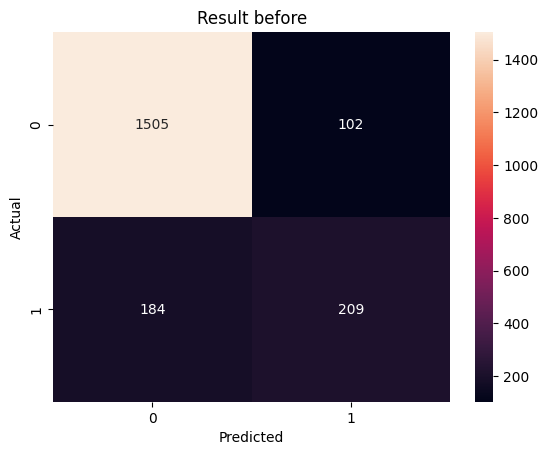

In [77]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_pred_converted)

sns.heatmap(cm, annot= True, fmt= 'd')
plt.title("Result before")
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Hyperameter Tuning using GridSearchCV

In [56]:
def build_model(optimizer = 'adam', activation= 'relu'):
    model = keras.Sequential([
        keras.layers.Dense(12, input_shape= (12,), activation = activation),
        keras.layers.Dense(10, activation = activation),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])

    model.compile(optimizer= optimizer,
                loss= 'binary_crossentropy',
                metrics= ['accuracy'])

    return model

In [57]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Wrap the ANN model with KerasClassifier
tuning_model = KerasClassifier(model = build_model, verbose= 0)

# Define the hyperparameter tuning space
param_grid = {
    'model__optimizer' : ['adam', 'sgd'],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

# GridSearchCV
grid = GridSearchCV(estimator= tuning_model, param_grid= param_grid, cv= 3, scoring= 'accuracy')
grid_result = grid.fit(X_train, y_train)

d:\Python Download\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Python Download\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Python Download\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Python Downlo

In [59]:
grid_res_table = pd.DataFrame(grid_result.cv_results_)
grid_res_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,param_model__optimizer,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,30.357058,1.339890,0.419894,0.068404,16,50,adam,"{'batch_size': 16, 'epochs': 50, 'model__optim...",0.853393,0.849269,0.847712,0.850125,0.002397,5
1,24.169290,0.343693,0.386278,0.050286,16,50,sgd,"{'batch_size': 16, 'epochs': 50, 'model__optim...",0.839520,0.850394,0.846212,0.845375,0.004478,6
2,60.489764,1.715660,1.086941,0.958819,16,100,adam,"{'batch_size': 16, 'epochs': 100, 'model__opti...",0.859768,0.860892,0.852963,0.857874,0.003503,1
3,49.508541,0.439337,0.382821,0.030281,16,100,sgd,"{'batch_size': 16, 'epochs': 100, 'model__opti...",0.858268,0.852268,0.852213,0.854250,0.002841,4
4,15.832113,0.386231,0.264366,0.020455,32,50,adam,"{'batch_size': 32, 'epochs': 50, 'model__optim...",0.856768,0.857518,0.849587,0.854624,0.003575,3


In [60]:
grid_res_table[['param_batch_size','param_epochs', 'params', 'mean_test_score']].sort_values('mean_test_score', ascending= False)

,param_batch_size,param_epochs,params,mean_test_score
2,16,100,"{'batch_size': 16, 'epochs': 100, 'model__opti...",0.857874
6,32,100,"{'batch_size': 32, 'epochs': 100, 'model__opti...",0.856499
4,32,50,"{'batch_size': 32, 'epochs': 50, 'model__optim...",0.854624
3,16,100,"{'batch_size': 16, 'epochs': 100, 'model__opti...",0.854250
0,16,50,"{'batch_size': 16, 'epochs': 50, 'model__optim...",0.850125
1,16,50,"{'batch_size': 16, 'epochs': 50, 'model__optim...",0.845375
7,32,100,"{'batch_size': 32, 'epochs': 100, 'model__opti...",0.840874
5,32,50,"{'batch_size': 32, 'epochs': 50, 'model__optim...",0.819125


In [ ]:
best_params = grid_result.best_params_
best_params

final_model = build_model(optimizer=best_params['model__optimizer'], activation= 'relu')
final_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

d:\Python Download\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8022 - loss: 0.5107
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7928 - loss: 0.4722
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8003 - loss: 0.4488
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8113 - loss: 0.4299
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8217 - loss: 0.4172
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8195 - loss: 0.4155
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8348 - loss: 0.3945
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8328 - loss: 0.3948
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8363 - loss: 0.3885
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8292 - loss: 0.4074
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8388 - loss: 0.3844
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━━━━━

In [65]:
final_model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8638 - loss: 0.3402


[0.33730530738830566, 0.8629999756813049]

In [66]:
y_pred_after = final_model.predict(X_test)
y_pred_after[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[0.04929553],
       [0.02788993],
       [0.12253948],
       [0.25522667],
       [0.07573662]], dtype=float32)

In [68]:
y_test[:5]

6252    0
4684    0
1731    0
4742    0
4521    0
Name: Exited, dtype: int64

In [69]:
y_pred_after_converted = []

for ele in y_pred_after:
    if ele >= 0.5:
        y_pred_after_converted.append(1)
    else:
        y_pred_after_converted.append(0)
        
y_pred_converted[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [70]:
y_test[:10]

6252    0
4684    0
1731    0
4742    0
4521    0
6340    0
576     0
5202    1
6363    0
439     0
Name: Exited, dtype: int64

In [72]:
print(classification_report(y_pred_after_converted, y_test))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      1733
           1       0.49      0.72      0.58       267

    accuracy                           0.86      2000
   macro avg       0.72      0.80      0.75      2000
weighted avg       0.89      0.86      0.87      2000



Text(50.722222222222214, 0.5, 'Actual')

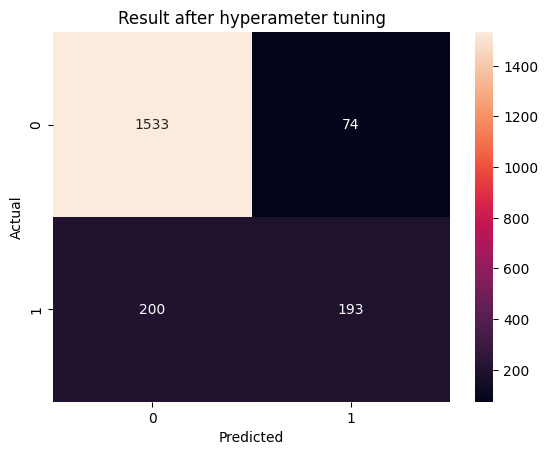

In [76]:
corr_matrix = tf.math.confusion_matrix(labels=y_test, predictions= y_pred_after_converted)

sns.heatmap(corr_matrix, annot=True, fmt = "d")
plt.title("Result after hyperameter tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")